<a href="https://colab.research.google.com/github/lsyang99/Solar-Panel-Detection-Samples/blob/master/Solar_Panel_Detection_Samples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# Environment Setting
Firstly, please change the runtime type to **GPU**.

In [ ]:
!git clone https://github.com/lsyang99/Solar-Panel-Detection-Samples.git
!git clone https://github.com/tensorflow/models.git
!git clone https://github.com/aalpatya/detect_hands

Cloning into 'Solar-Panel-Detection-Samples'...
remote: Enumerating objects: 243, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 243 (delta 1), reused 1 (delta 1), pack-reused 240
Receiving objects: 100% (243/243), 119.86 MiB | 44.88 MiB/s, done.
Resolving deltas: 100% (75/75), done.
Cloning into 'models'...
remote: Enumerating objects: 58192, done.
remote: Counting objects: 100% (524/524), done.
remote: Compressing objects: 100% (238/238), done.
remote: Total 58192 (delta 294), reused 497 (delta 281), pack-reused 57668
Receiving objects: 100% (58192/58192), 573.15 MiB | 37.11 MiB/s, done.
Resolving deltas: 100% (40289/40289), done.
Cloning into 'detect_hands'...
remote: Enumerating objects: 206, done.
remote: Counting objects: 100% (88/88), done.
remote: Compressing objects: 100% (64/64), done.
remote: Total 206 (delta 38), reused 56 (delta 20), pack-reused 118
Receiving objects: 100% (206/206), 53.76 MiB | 29.25 MiB/s, d

In [ ]:
%cd /content/models/research
!protoc object_detection/protos/*.proto --python_out=.
!cp object_detection/packages/tf2/setup.py . 
!python -m pip install .

/content/models/research
Processing /content/models/research
     |████████████████████████████████| 9.6MB 20.5MB/s 
     |████████████████████████████████| 358kB 49.7MB/s 
     |████████████████████████████████| 1.6MB 47.0MB/s 
     |████████████████████████████████| 153kB 55.7MB/s 
     |████████████████████████████████| 2.3MB 44.0MB/s 
     |████████████████████████████████| 829kB 51.6MB/s 
     |████████████████████████████████| 61kB 9.8MB/s 
     |████████████████████████████████| 51kB 9.3MB/s 
     |████████████████████████████████| 61kB 10.3MB/s 
     |████████████████████████████████| 645kB 50.6MB/s 
     |████████████████████████████████| 174kB 55.6MB/s 
     |████████████████████████████████| 38.2MB 66kB/s 
     |████████████████████████████████| 686kB 47.1MB/s 
     |████████████████████████████████| 102kB 13.9MB/s 
     |████████████████████████████████| 1.2MB 39.9MB/s 
  Created wheel for object-detection: filename=object_detection-0.1-cp37-none-any.whl size=1652954 sha256

---
# Model Training

In [ ]:
# TEST IF YOU WANT
!python object_detection/builders/model_builder_tf2_test.py

2021-06-09 10:20:03.079076: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
Running tests under Python 3.7.10: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2021-06-09 10:20:05.093498: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-06-09 10:20:05.145896: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-06-09 10:20:05.146675: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-06-09 10:20:05.146742: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfull

In [ ]:
# Generate TFRecord from CSV
%cd /content/Solar-Panel-Detection-Samples/data
!cp /content/detect_hands/generate_tfrecord.py .

# 註解掉 generate_tfrecord.py 第84行，避開錯誤
!sed -i '84 s/^/#/' generate_tfrecord.py
 
# For the train dataset
!python generate_tfrecord.py --csv_input=images/train/train_labels.csv  --output_path=train.record
# For the test dataset
!python generate_tfrecord.py --csv_input=images/test/test_labels.csv  --output_path=test.record

/content/Solar-Panel-Detection-Samples/data
2021-06-10 15:12:59.984402: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
Successfully created the TFRecords: /content/Solar-Panel-Detection-Samples/data/train.record
2021-06-10 15:13:02.203552: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
Successfully created the TFRecords: /content/Solar-Panel-Detection-Samples/data/test.record


In [ ]:
%cd /content
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
# Unzip
!tar -xzvf ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz

# Rename the unzipped folder
!mv ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8 ssd_mobilenet_v2_fpnlite_320x320

/content
--2021-06-10 15:13:03--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 142.251.33.208, 2607:f8b0:4004:80a::2010
Connecting to download.tensorflow.org (download.tensorflow.org)|142.251.33.208|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20515344 (20M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’

ssd_mobilenet_v2_fp 100%[===================>]  19.56M   104MB/s    in 0.2s    

2021-06-10 15:13:04 (104 MB/s) - ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’ saved [20515344/20515344]

ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
ssd_mobilenet_v2_fpnlite_320x320_c

In [ ]:
# Train it for 20 minutes and MANUALLY terminate it.
%cd /content/models/research/object_detection/
 
!python model_main_tf2.py \
--pipeline_config_path=/content/Solar-Panel-Detection-Samples/data/pipeline.config \
--model_dir=/content/output_training --alsologtostderr  # !sed -i '388,389 s/^/#/' /usr/local/lib/python3.7/dist-packages/object_detection/model_lib_v2.py

/content/models/research/object_detection
2021-06-10 15:13:05.263506: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-06-10 15:13:07.575994: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-06-10 15:13:07.632463: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-06-10 15:13:07.633075: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-06-10 15:13:07.633121: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-06-10 15:13:07.743555: I t

In [ ]:
# Export
%cd /content/models/research/object_detection

!python exporter_main_v2.py \
--trained_checkpoint_dir=/content/output_training \
--pipeline_config_path=/content/Solar-Panel-Detection-Samples/data/pipeline.config \
--output_directory /content/inference

/content/models/research/object_detection
2021-06-10 15:51:14.834938: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-06-10 15:51:16.675861: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-06-10 15:51:16.709663: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-06-10 15:51:16.710306: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-06-10 15:51:16.710355: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-06-10 15:51:16.714120: I t

---
# Inference

In [ ]:
# Run if the model hasn't been trained.
!git clone https://github.com/tensorflow/models.git
!git clone https://github.com/lsyang99/Solar-Panel-Detection-Samples
%cd /content/models/research
!protoc object_detection/protos/*.proto --python_out=.
!cp object_detection/packages/tf2/setup.py . 
!python -m pip install .

In [ ]:
%cd /content
import cv2
import numpy as np
import pandas as pd
import tensorflow_hub as hub
from object_detection.utils import visualization_utils as viz_utils
from google.colab.patches import cv2_imshow
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()
category_index = {1: {'id': 1, 'name': 'solar_panel'}}
label_id_offset = 0

def inference():
    viz_utils.visualize_boxes_and_labels_on_image_array(
        image_np_with_detections[0],
        result['detection_boxes'][0],
        (np.array(result['detection_classes'])[0] + label_id_offset).astype(int), # tenor轉ndarray
        result['detection_scores'][0],
        category_index,
        use_normalized_coordinates=True,
        max_boxes_to_draw=1,
        min_score_thresh=.01,
        agnostic_mode=False,)

/content


In [ ]:
# Load a saved model
model = hub.load('/content/Solar-Panel-Detection-Samples/inference/saved_model')

/content/Solar-Panel-Detection-Samples/data

images/test/00000004.jpg


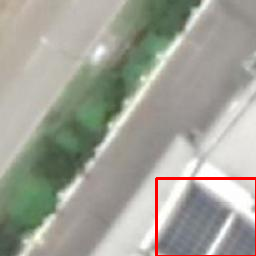

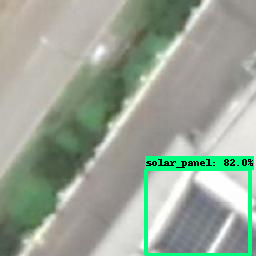


images/test/00000005.jpg


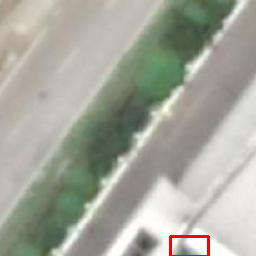

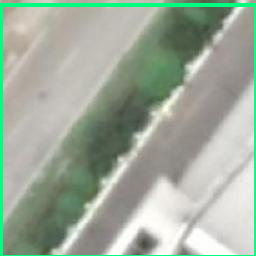


images/test/00000006.jpg


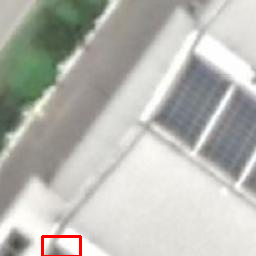

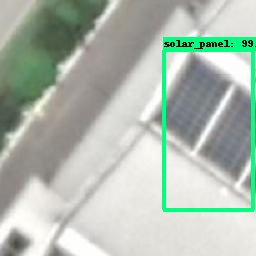


images/test/00000007.jpg


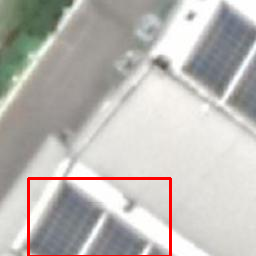

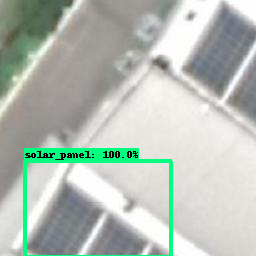


images/test/00000010.jpg


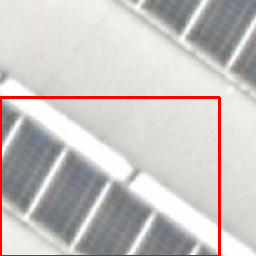

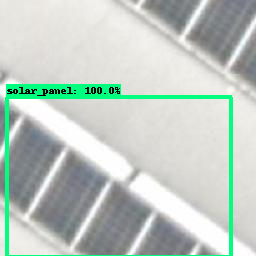


images/test/00000011.jpg


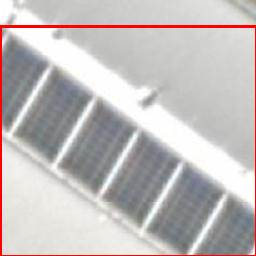

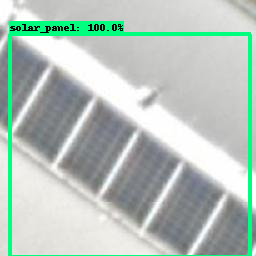


images/test/00000012.jpg


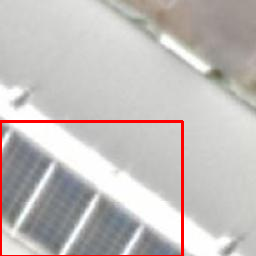

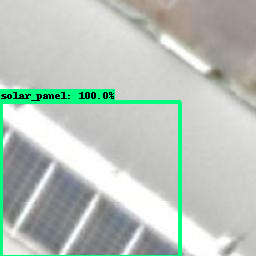


images/test/00000013.jpg


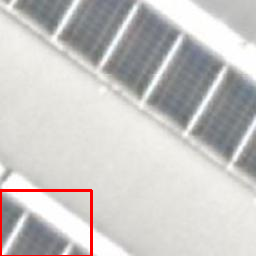

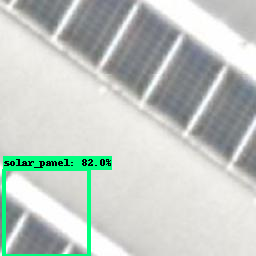


images/test/00000014.jpg


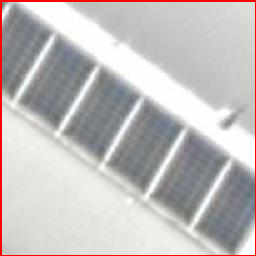

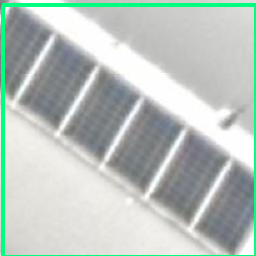


images/test/00000028.jpg


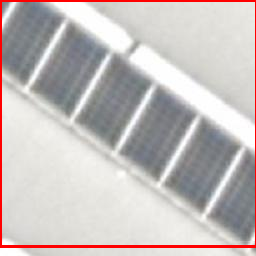

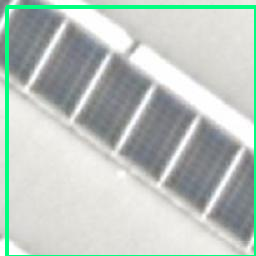


images/test/00000029.jpg


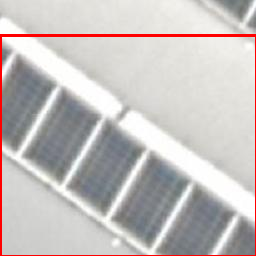

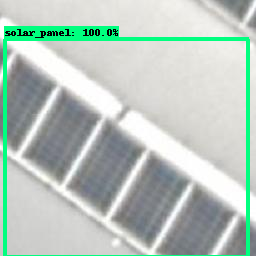


images/test/00000038.jpg


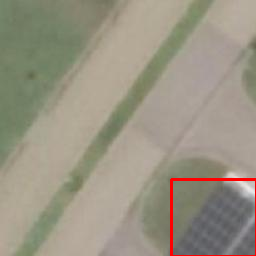

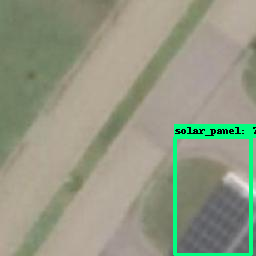


images/test/00000039.jpg


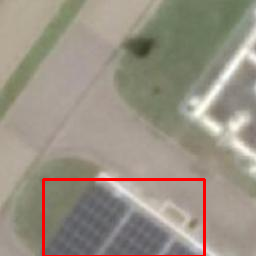

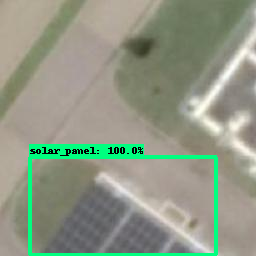


images/test/00000048.jpg


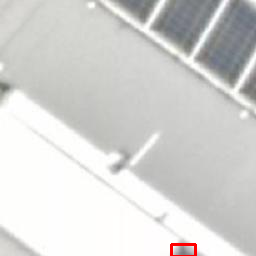

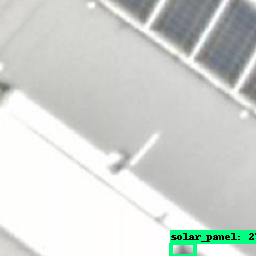


images/test/00000049.jpg


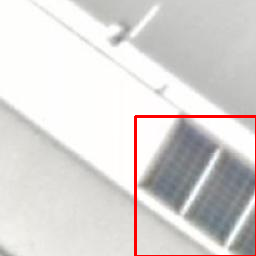

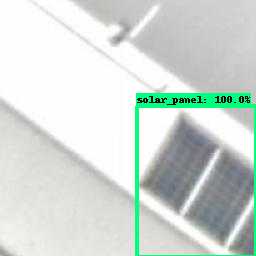

In [ ]:
# Load test images and compare with their inference
%cd /content/Solar-Panel-Detection-Samples/data
test_data = pd.read_csv('/content/Solar-Panel-Detection-Samples/data/images/test/test_labels.csv')

for i in range(len(test_data)):
    print(f'\n{test_data.iloc[i,0]}')
    image = cv2.imread(test_data.iloc[i,0])
    image_np = image.reshape(-1,256,256,3)
    image_np_with_detections = image_np.copy()
    xmin = round(test_data.iloc[i,4])
    ymin = round(test_data.iloc[i,5])
    xmax = round(test_data.iloc[i,6])
    ymax = round(test_data.iloc[i,7])
    cv2.rectangle(image, (xmin,ymin), (xmax,ymax), (0,0,255), 2)
    cv2_imshow(image)
    result = model(image_np)
    inference()
    cv2_imshow(image_np_with_detections[0])